In [1]:

import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/ralbu85/DataScience_2022S/master/data/auto.csv')

In [2]:
df=pd.get_dummies(df, columns=['origin'])
y=df['mpg']
X=df.drop(columns=['mpg'])

In [3]:
X_norm = (X-X.mean())/X.std()
X_norm

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_1,origin_2,origin_3
0,1.482053,1.075915,0.663285,0.619748,-1.283618,-1.623241,0.773608,-0.457538,-0.501749
1,1.482053,1.486832,1.572585,0.842258,-1.464852,-1.623241,0.773608,-0.457538,-0.501749
2,1.482053,1.181033,1.182885,0.539692,-1.646086,-1.623241,0.773608,-0.457538,-0.501749
3,1.482053,1.047246,1.182885,0.536160,-1.283618,-1.623241,0.773608,-0.457538,-0.501749
4,1.482053,1.028134,0.923085,0.554997,-1.827320,-1.623241,0.773608,-0.457538,-0.501749
...,...,...,...,...,...,...,...,...,...
387,-0.862911,-0.519972,-0.479835,-0.220842,0.021267,1.634321,0.773608,-0.457538,-0.501749
388,-0.862911,-0.930889,-1.363154,-0.997859,3.283479,1.634321,-1.289347,2.180035,-0.501749
389,-0.862911,-0.567753,-0.531795,-0.803605,-1.428605,1.634321,0.773608,-0.457538,-0.501749
390,-0.862911,-0.711097,-0.661694,-0.415097,1.108671,1.634321,0.773608,-0.457538,-0.501749


In [4]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold, cross_validate

kfold=KFold(n_splits=5, shuffle=True)
train_mse=[]
test_mse=[]
for i in range(2,30):
    knn = KNeighborsRegressor(n_neighbors=i)    
    result = cross_validate(X=X_norm, y=y,
                          cv=kfold,
                          scoring=['r2','neg_mean_squared_error'],
                          estimator=knn,
                          return_train_score=True)
    print(i, result['test_r2'].mean(), result['test_neg_mean_squared_error'].mean())
    train_mse.append(-1*result['train_neg_mean_squared_error'].mean())
    test_mse.append(-1*result['test_neg_mean_squared_error'].mean())

2 0.824385099965004 -10.638204235637781
3 0.8604398105047558 -7.9603090266508
4 0.8481522350837623 -8.926440867413177
5 0.8494797000575962 -8.745796144109054
6 0.8575122168227706 -8.549888825778066
7 0.852358238049683 -8.567826971100029
8 0.8457660321364712 -9.333888555866602
9 0.8372020819948798 -9.741061283614027
10 0.8380289234569582 -9.686240668614087
11 0.8360632201423697 -9.846445315329088
12 0.8116577614292808 -11.643863333513647
13 0.8279630190008014 -10.371794579873974
14 0.8130782895485809 -10.958053098649392
15 0.8047686057481395 -11.504559746114177
16 0.8142041161078446 -11.150435692043981
17 0.8074701757371369 -11.394267652281146
18 0.7981277661913662 -11.96683804360457
19 0.7977278598340317 -12.392759585377632
20 0.800233625915855 -12.131241127069135
21 0.7935090507054583 -12.561804459488005
22 0.7969279586094337 -12.454072737197594
23 0.7859655810972113 -13.061442842251031
24 0.7859580845058165 -12.98581563469202
25 0.7876124610245104 -12.885093840701074
26 0.78558297902

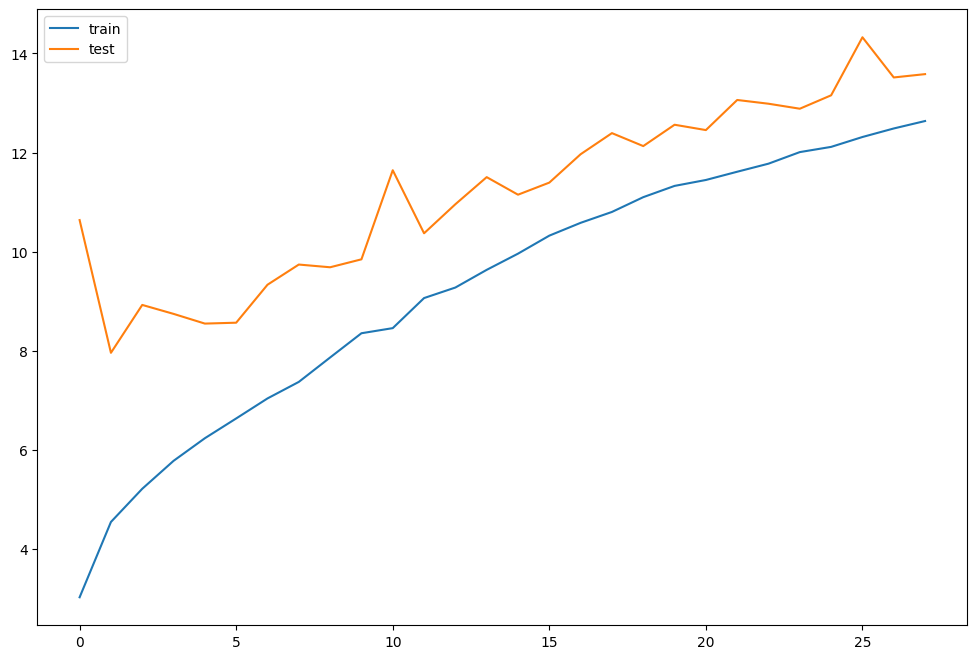

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(train_mse, label='train')
plt.plot(test_mse, label='test')
plt.legend()

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, GridSearchCV
import warnings

# 경고문구 없애기
warnings.filterwarnings('ignore')

# 파이프라인 재료 만들기
scaler = StandardScaler() #데이터 스케일링
knn = KNeighborsRegressor() #KNN Regressor

# 파이프라인 만들기
pipe = Pipeline([('scaler',scaler),('knn',knn)])

# 하이퍼패러미터 범주 지정
degree = range(1,19)
param_grid = {'knn__n_neighbors': degree}

# 교차검증 객체 지정
kfold = KFold(n_splits = 5, shuffle = True)

# GridSearchCV를 이용하여 하이퍼패러미터 튜닝
grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=kfold,
    scoring='neg_mean_squared_error',
    return_train_score=True    
)

#학습
grid_search.fit(X,y)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsRegressor())]),
             param_grid={'knn__n_neighbors': range(1, 19)},
             return_train_score=True, scoring='neg_mean_squared_error')

In [7]:
import pandas as pd
df=pd.DataFrame(grid_search.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002846,0.002083,0.000438,0.000875,1,{'knn__n_neighbors': 1},-10.028608,-10.621899,-8.420128,-15.400256,...,-11.186665,2.329987,14,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000
1,0.002988,0.002854,0.001553,0.002423,2,{'knn__n_neighbors': 2},-8.573797,-9.953987,-8.089103,-12.862019,...,-10.453410,2.030994,9,-3.343762,-3.306542,-3.249116,-2.781202,-3.032930,-3.142710,0.210392
2,0.003631,0.003326,0.001001,0.002002,3,{'knn__n_neighbors': 3},-7.792883,-8.374332,-6.766353,-13.717123,...,-9.632301,2.584344,4,-4.948995,-4.705694,-4.290994,-4.154144,-3.885354,-4.397036,0.382620
3,0.002816,0.002927,0.001006,0.002012,4,{'knn__n_neighbors': 4},-8.416796,-8.065380,-7.241226,-14.400537,...,-9.731361,2.574800,5,-5.719665,-5.118381,-5.341781,-4.474713,-4.567822,-5.044472,0.469374
4,0.001126,0.001571,0.003186,0.003141,5,{'knn__n_neighbors': 5},-8.755073,-7.509428,-5.989769,-13.406215,...,-9.166724,2.529635,1,-5.963117,-5.862280,-5.935024,-5.180169,-5.059387,-5.599996,0.395324
5,0.002556,0.002538,0.001345,0.001830,6,{'knn__n_neighbors': 6},-8.965105,-8.079662,-5.244986,-14.602788,...,-9.192637,3.038390,2,-6.759361,-6.231800,-6.366545,-5.699303,-5.665688,-6.144539,0.415317
6,0.003929,0.001181,0.001469,0.001256,7,{'knn__n_neighbors': 7},-10.510964,-7.850150,-5.372389,-14.799055,...,-9.563854,3.126862,3,-7.187653,-6.674084,-7.029332,-6.196753,-5.990932,-6.615751,0.462057
7,0.001178,0.001446,0.002610,0.002239,8,{'knn__n_neighbors': 8},-10.320008,-8.186384,-6.003195,-15.403435,...,-9.890289,3.121411,6,-7.548315,-7.105055,-7.351419,-6.442780,-6.514647,-6.992443,0.442935
8,0.002328,0.003246,0.001621,0.003243,9,{'knn__n_neighbors': 9},-10.826718,-8.438945,-5.890733,-15.764653,...,-10.130209,3.262692,7,-7.894209,-7.482244,-7.750534,-6.603676,-6.726153,-7.291363,0.529731
9,0.003328,0.001804,0.000000,0.000000,10,{'knn__n_neighbors': 10},-11.109705,-8.752699,-6.119162,-16.052692,...,-10.318575,3.291521,8,-8.113888,-7.951809,-8.134688,-6.780963,-7.153970,-7.627064,0.554949


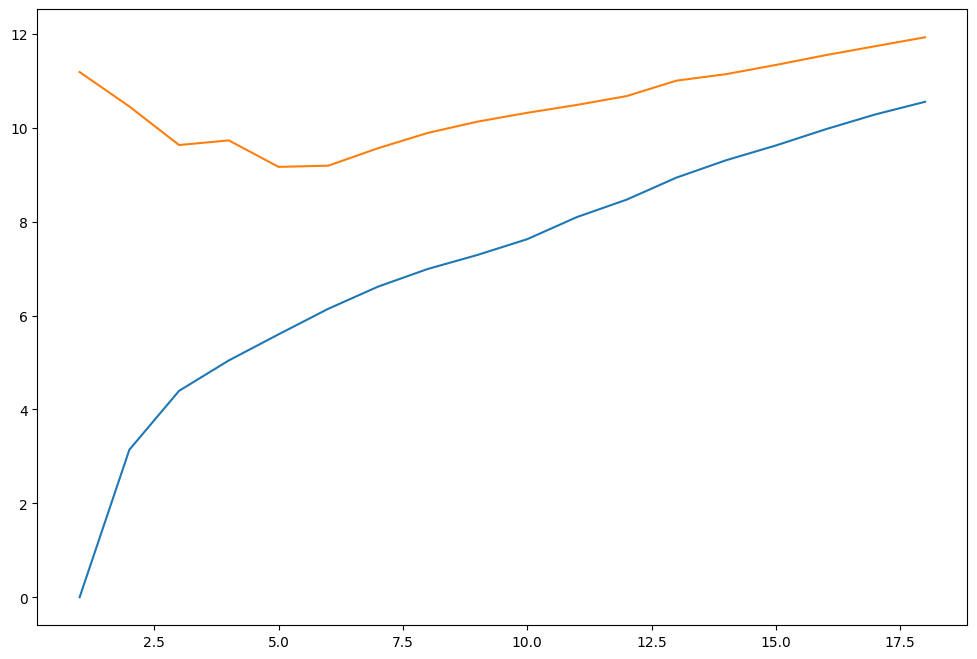

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(df['param_knn__n_neighbors'], -df['mean_train_score'])
plt.plot(df['param_knn__n_neighbors'], -df['mean_test_score'])

In [9]:

grid_search.best_params_, grid_search.best_score_

({'knn__n_neighbors': 5}, -9.166723842908148)